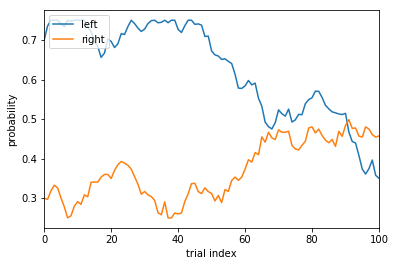

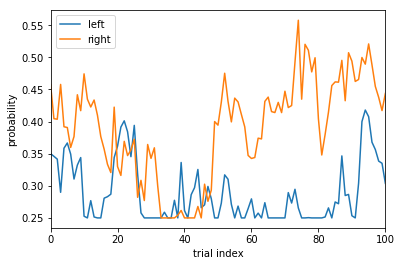

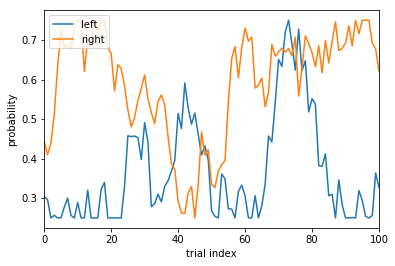

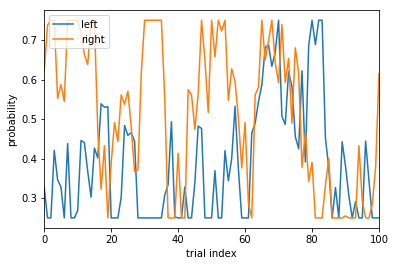

In [43]:
#!/usr/bin/python

"""
generate_trial_data.py

Use this module to generate trial data for the 2-armed bandit experiment with
fractals.
"""

import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Experiment parameters
NUM_TRIALS = 100
REWARD = 1
PROB_LOWER_BOUND = 0.25
PROB_UPPER_BOUND = 0.75
PROB_SIGMA = 0.03

fractals = np.random.choice(np.arange(1,21), 2, replace=False)
fractal_left = fractals[0]
fractal_right = fractals[1]

with open('trial_types.csv', 'w') as csvfile:
    fieldnames = ['trial', 'fractal_left', 'fractal_right', 'prob_left',
                  'prob_right', 'reward_left', 'reward_right']
    writer = csv.DictWriter(csvfile, delimiter=',', fieldnames=fieldnames)
    writer.writeheader()

    #prob_left = np.random.uniform(PROB_LOWER_BOUND, PROB_UPPER_BOUND)
    #prob_right = np.random.uniform(PROB_LOWER_BOUND, PROB_UPPER_BOUND)
    prob_left = 0.7
    prob_right = 0.3
    
    
    #mine
    left = [prob_left]
    right = [prob_right]
    
    
    
    GG = [0.02, 0.039148676411688635, 0.0766309432393553, 0.15]
   
    for i, PROB_SIGMA in enumerate(GG):
        left = [prob_left]
        right = [prob_right]
        for trial in xrange(1, NUM_TRIALS + 1):
            
            writer.writerow({'trial': trial,
                             'fractal_left': 'fig/%d.jpg' % fractal_left,
                             'fractal_right': 'fig/%d.jpg' % fractal_right,
                             'prob_left': '%.3f' % prob_left,
                             'prob_right': '%.3f' % prob_right,
                             'reward_left': REWARD,
                             'reward_right': REWARD})



            noise = PROB_SIGMA * np.random.randn()
            prob_left += noise
            if prob_left<PROB_LOWER_BOUND:
                prob_left=PROB_LOWER_BOUND
            elif prob_left > PROB_UPPER_BOUND:
                prob_left=PROB_UPPER_BOUND
       
            noise = PROB_SIGMA * np.random.randn()
            prob_right += noise
            if prob_right<PROB_LOWER_BOUND:
                prob_right=PROB_LOWER_BOUND
            elif prob_right > PROB_UPPER_BOUND:
                prob_right=PROB_UPPER_BOUND


            left.append(prob_left)
            right.append(prob_right)
            
        plt.figure()
        
        plt.plot(left,label = 'left')
        plt.plot(right, label = 'right')
        plt.xlabel('trial index')
        plt.ylabel('probability')
        plt.legend(loc = 'upper left' )
        plt.xlim([0,100])

        
        plt.savefig('left and right prob %d.png' % i)

(<matplotlib.figure.Figure at 0x89a8278>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000008C4D080>,
         <matplotlib.axes._subplots.AxesSubplot object at 0x0000000008D8DDA0>]], dtype=object))

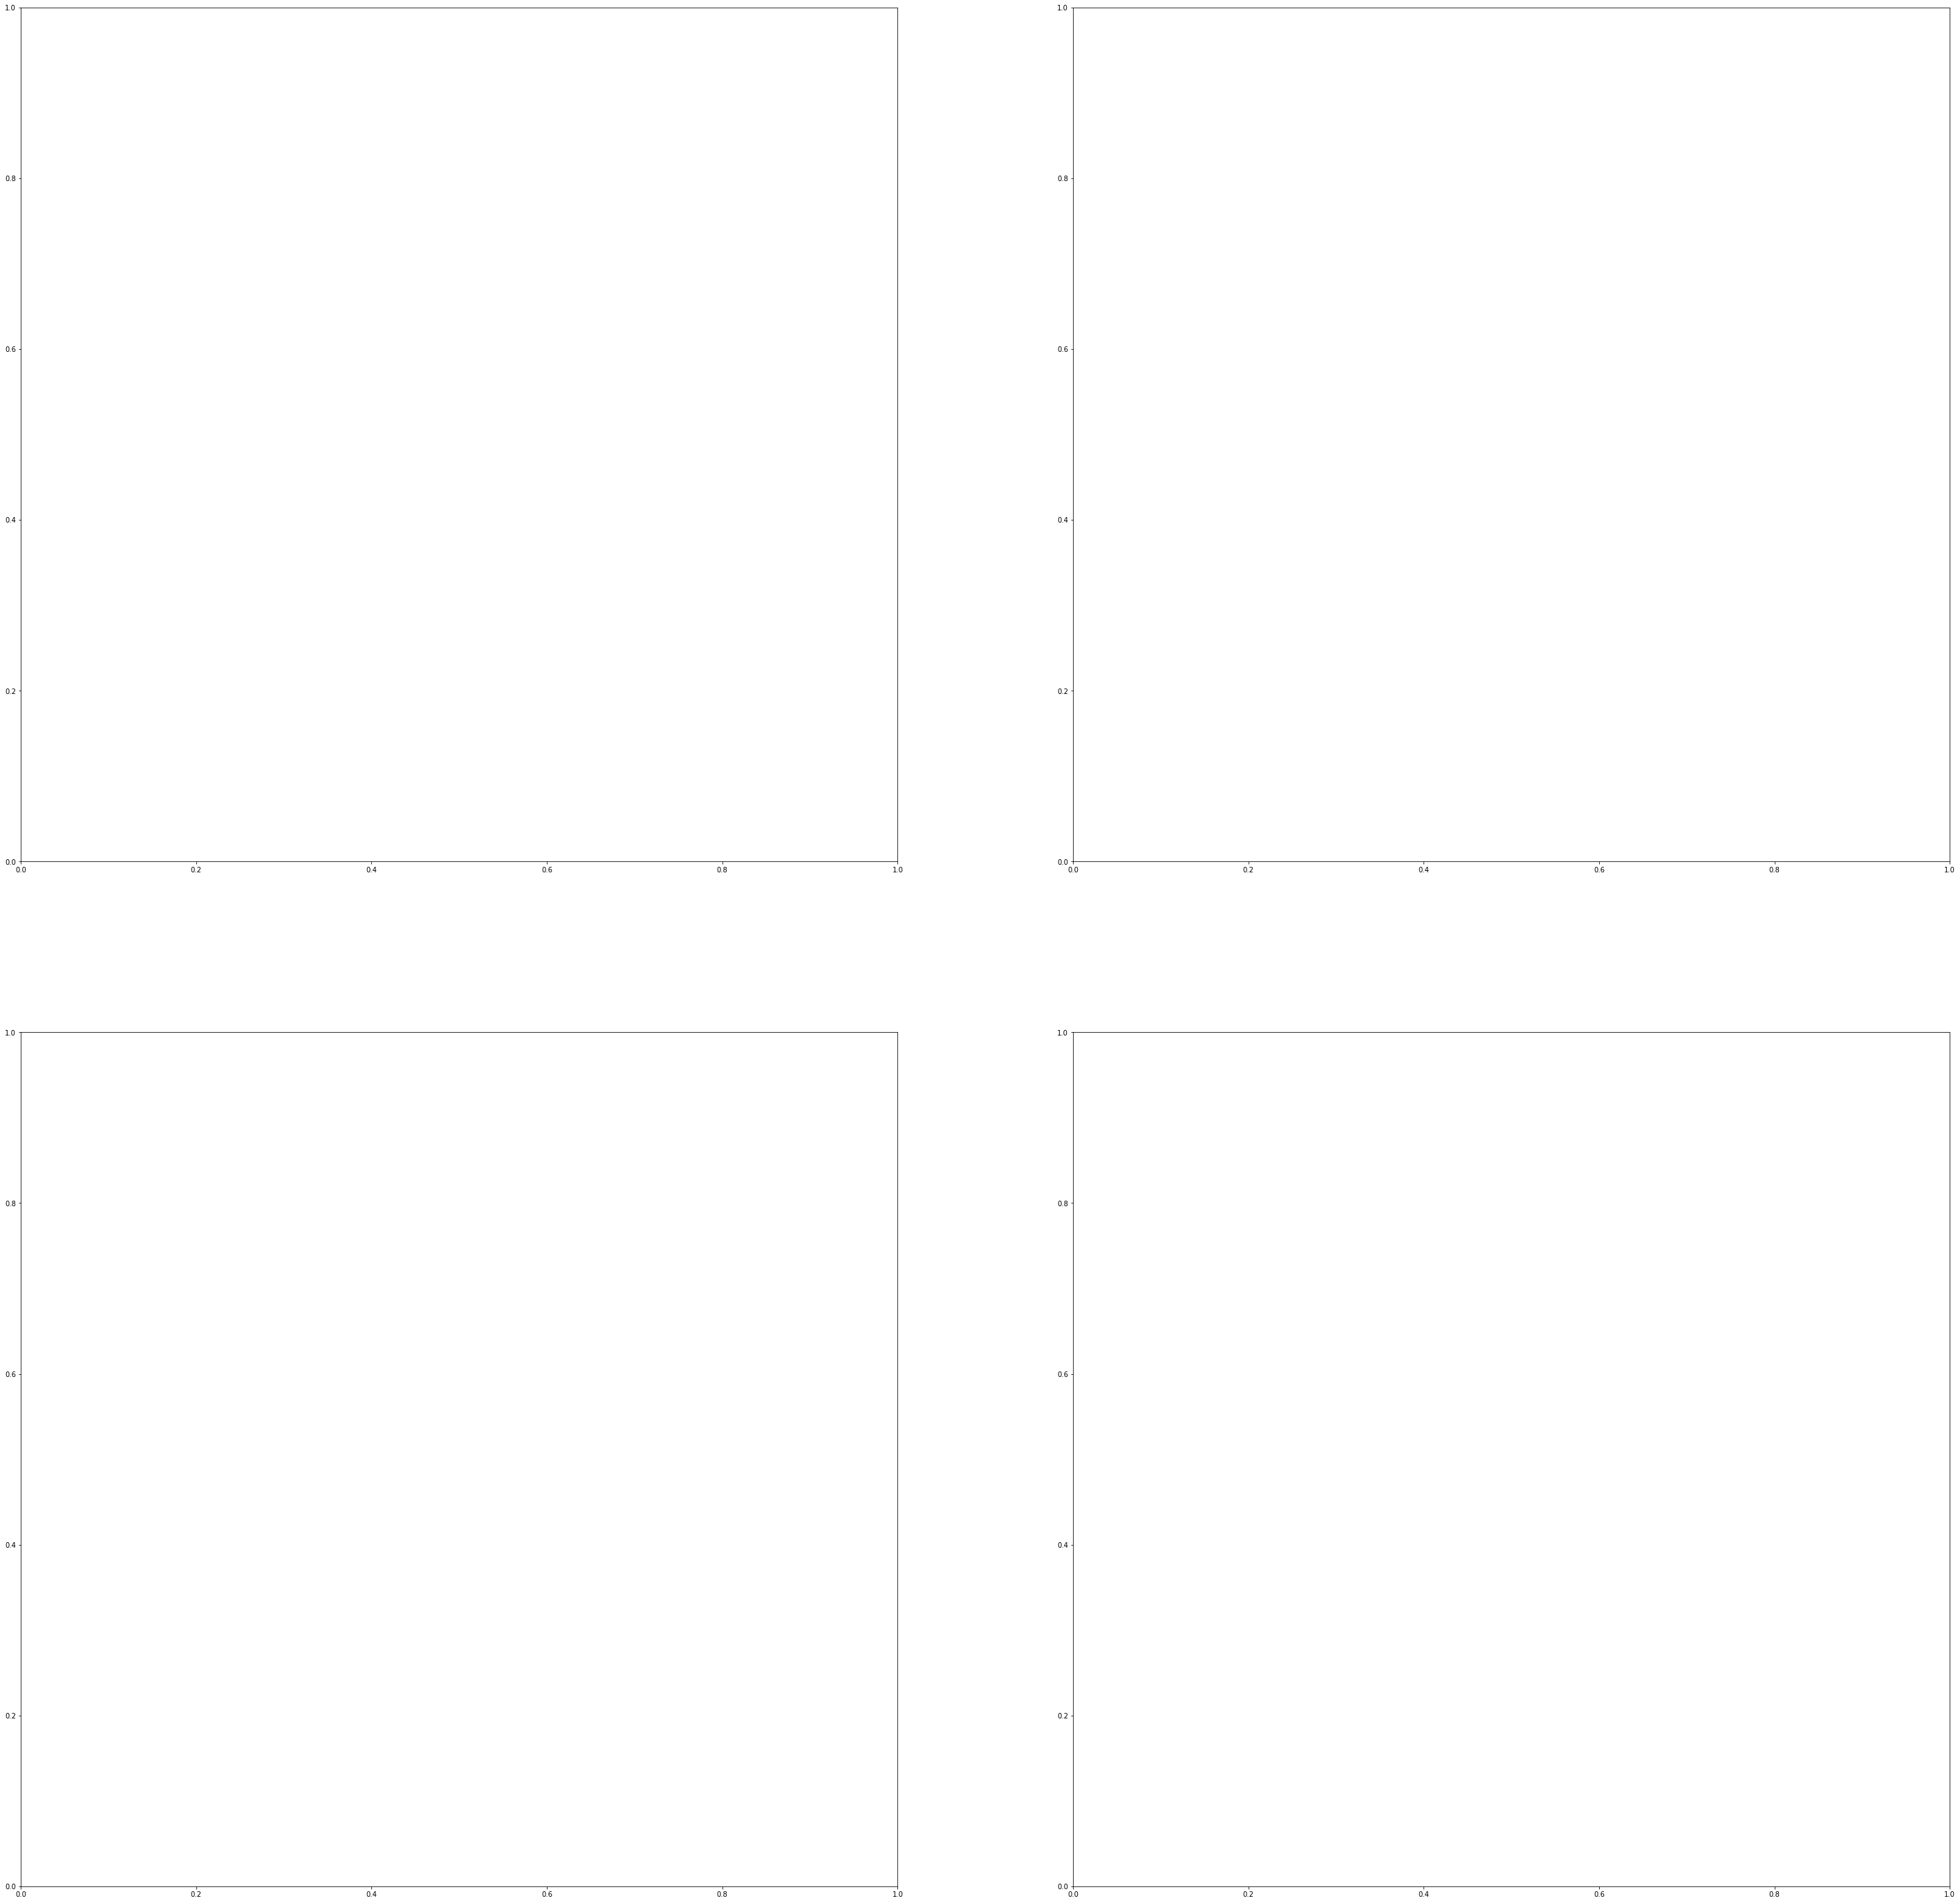

In [30]:
plt.subplots(2,2,figsize = (50,50))